In [17]:
import pandas as pd
import numpy as np  #to perform mathematical calculation
import seaborn as sns  #for data visualization
import matplotlib.pyplot as plt  #for plotting graphs
import warnings
warnings.filterwarnings("ignore")

In [89]:
#reading the data file into the python environment 
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [91]:
#creating the copy

train_original = train.copy()
test_original = test.copy()



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
#Looking for the columns of each of the dataset
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [9]:
#to print the datatype of each of the attributes
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
#To know the size of the dataset
train.shape

(614, 13)

In [16]:
test.shape

(367, 12)

In [17]:
#Uni-variate analysis on target variable
#Frequency table 
train['Loan_Status'].value_counts()


Y    422
N    192
Name: Loan_Status, dtype: int64

In [18]:
#normalize can be set true to print the proportation instead of the numbers
train['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

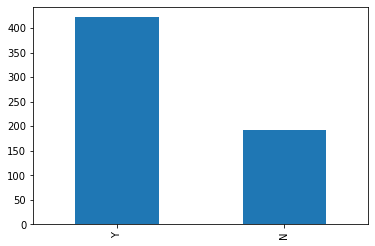

In [19]:
#To plot the bar 
train['Loan_Status'].value_counts().plot.bar()

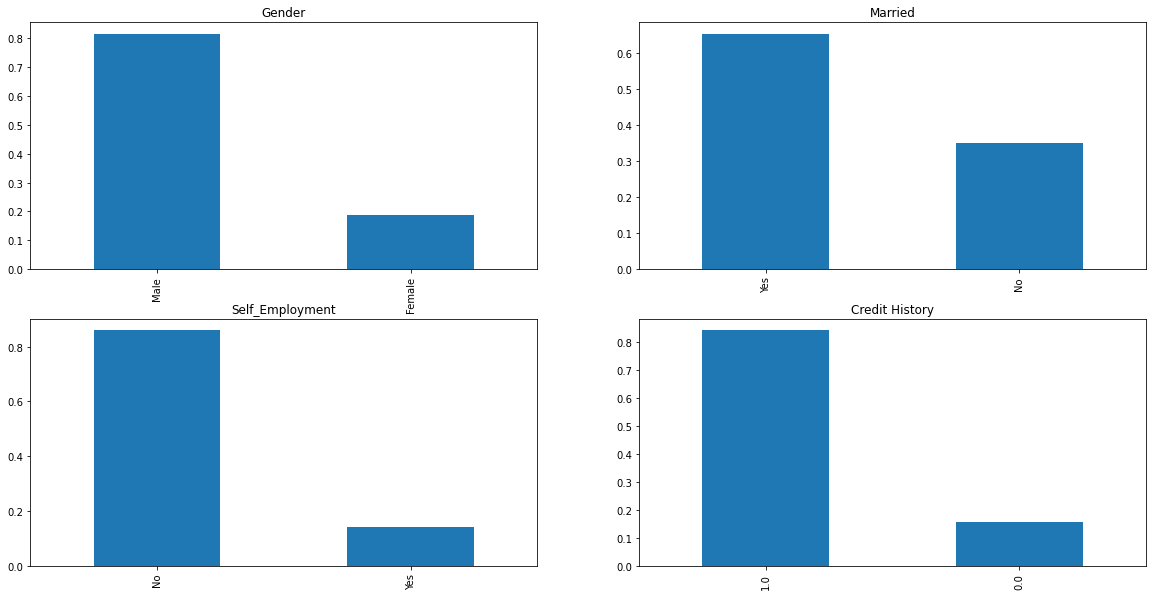

In [24]:
#Visulaize each variable separately.There are different type of variables categorical , ordinal and numerical
#Independent Variables we are using sub plot concept 
plt.figure(1) 
plt.subplot(221)
train['Gender'].value_counts(normalize =True).plot.bar(figsize = (20,10),title= "Gender")
plt.subplot(222)
train['Married'].value_counts(normalize = True).plot.bar(title = "Married")
plt.subplot(223)
train['Self_Employed'].value_counts(normalize = True).plot.bar(title = "Self_Employment")
plt.subplot(224)
train['Credit_History'].value_counts(normalize = True).plot.bar(title = "Credit History")
plt.show()


In [25]:
#The following are the observation of the categorical data
#80% of the applicants are male
#Around 65% of the applicants in the dataset are married
#Around 15% applicants are self employed 
#Around 855 applicants have repaid their debts.

<AxesSubplot:title={'center':'Property_Area'}>

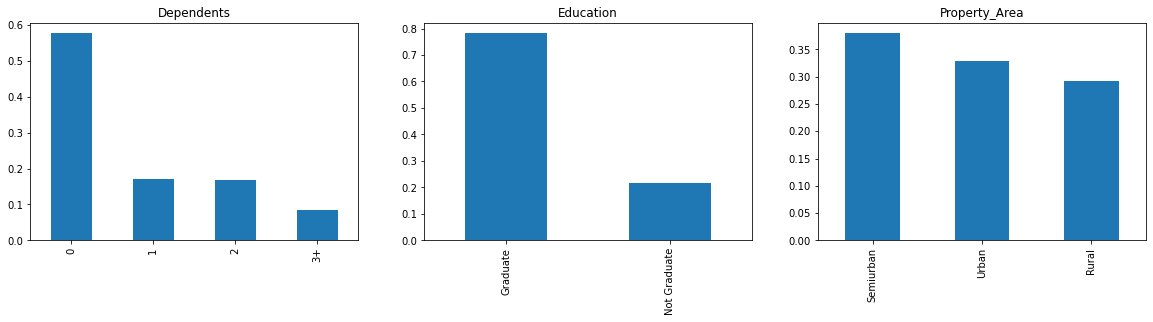

In [32]:
#Independent Variables(Ordinal)
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize= True).plot.bar(figsize=(20,4),title = "Dependents")
plt.subplot(132)
train['Education'].value_counts(normalize= True).plot.bar(title = "Education")
plt.subplot(133)
train['Property_Area'].value_counts(normalize= True).plot.bar(title = "Property_Area")

In [33]:
#Observation 
#Most of the appliatns don't have any dependents
#Around 80% of the applicants are Graduate
#Most of teh applicants are From Semiurban Areas

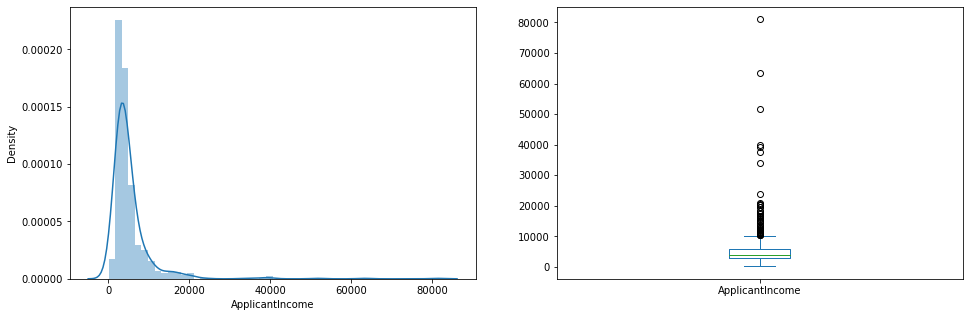

In [34]:
#Independent Variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

In [35]:
#The box plot confirms the presence of a lot of outlier.This can be attributed to the income disparity in the society.

Text(0.5, 0.98, '')

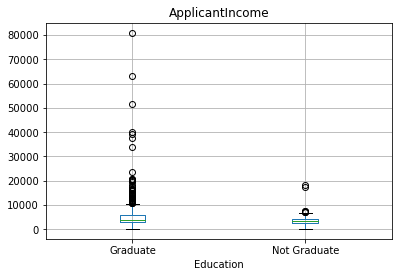

In [37]:
train.boxplot(column="ApplicantIncome",by = "Education")
plt.suptitle("")

In [38]:
#Let's look the coapplicant income distribution 

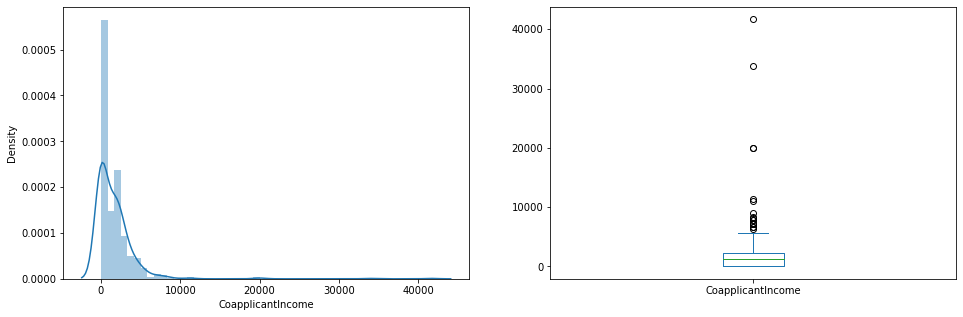

In [39]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

In [40]:
#We can see the similar distribution as that of the applicant income.Majority of the coapplicants's income ranges from 0 to 5000.we can also see the outliers in the coapplicant income and it is not normally distributes.

In [41]:
#Lets look at the distribution of LoanAmount variable 

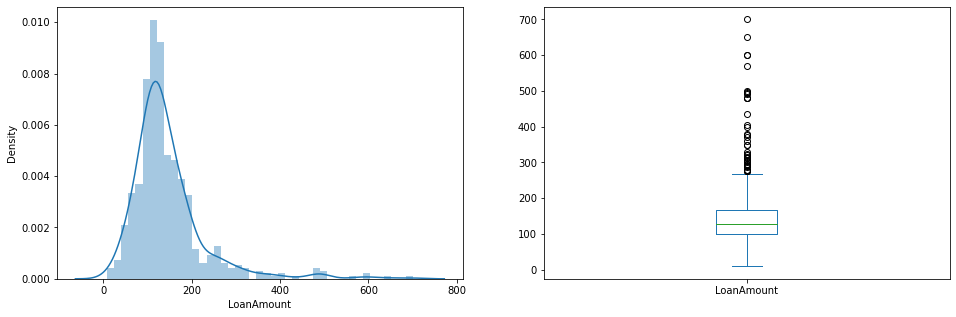

In [43]:
plt.figure(1)
plt.subplot(121)
df = train.dropna() #Dropping the null values
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

<AxesSubplot:xlabel='Gender'>

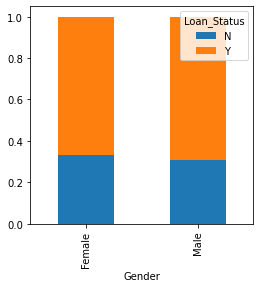

In [44]:
#BIVARIATE ANALYSIS
#After Looking all the variables individually in univariate analysis, we will now explore them again in with respect to the target variable.
#CATEGORICAL VAR VS TARGET VARIABLE

Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind = "bar",stacked=True,figsize=(4,4))

In [45]:
#It can be inferred that the proportion of males and females applicants is more or less same for both approved and unapproved loans

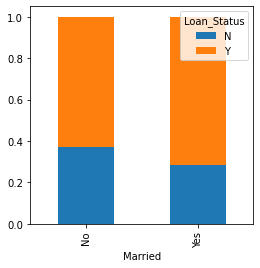

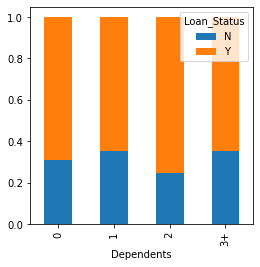

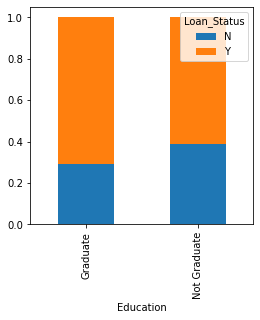

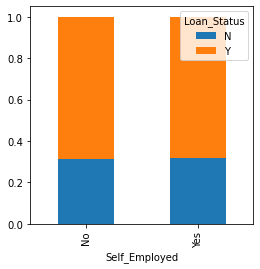

In [47]:
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Education = pd.crosstab(train["Education"],train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])

Married.div(Married.sum(1).astype(float),axis = 0).plot(kind = "bar",stacked=True,figsize=(4,4)) 
plt.show()

Dependents.div(Dependents.sum(1).astype(float),axis = 0).plot(kind = "bar",stacked=True,figsize=(4,4)) 
plt.show()

Education.div(Education.sum(1).astype(float),axis = 0).plot(kind = "bar",stacked=True,figsize=(4,4)) 
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float),axis = 0).plot(kind = "bar",stacked=True,figsize=(4,4)) 
plt.show()


In [48]:
# Proportion of married applicants is higher for the approved loan
#Distribution of applicants with 1 or 3 dependensts is similar across both the categories of loan_Status 
#there is no siignificant we can infere from Self Employmment 

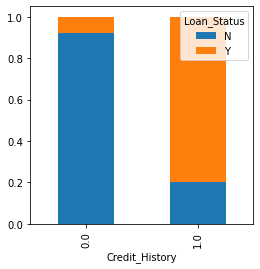

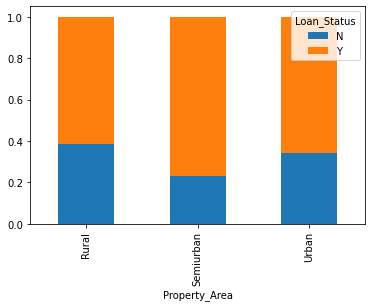

In [50]:
#Now we will look at the relationship between remaining categorical independent variables and Loan_Status 

Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis = 0).plot(kind= "bar",stacked = True , figsize= (4,4))
plt.show()

Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.show()

In [51]:
#The applicants with the credit history 1 are more likely to get the approval 
#Proportion of loans getting approved in semi urban area is higher as compared to that in rural or urban area


In [52]:
#NUMERICAL INDEPENDENT Vs TARGET VARAIBLE

In [53]:
#We will try to find the mean income of people for ehich the loan has been approved vs the mean income of people for ehich the loan has not been approved 

<AxesSubplot:xlabel='Loan_Status'>

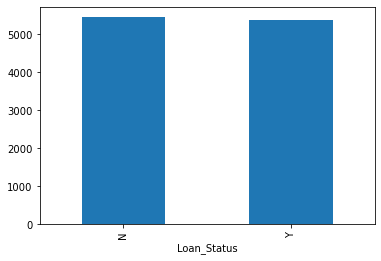

In [54]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [55]:
#Lets make the bins for the applicant income variable based on the values in it and analyze the corresponding loan status 

Text(0, 0.5, 'Percentage')

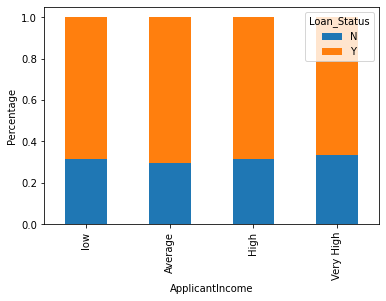

In [58]:
bins = [0,2500,4000,6000,81000]
groups=['low','Average','High','Very High']
train['Income_bin'] = pd.cut(train['ApplicantIncome'],bins,labels=groups)

Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])

Income_bin.div(Income_bin.sum(1).astype(float),axis = 0).plot(kind="bar",stacked = True)
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")

In [59]:
#It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if applicant income is high the chances of loan approval will also be high 

Text(0.5, 1.0, 'Coapplicants income approval of loan')

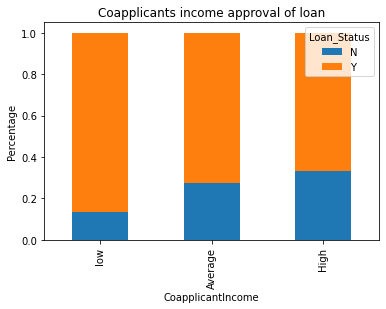

In [62]:
#Now we will analyze theh coapplicant inncome and loan amount variable in similar manner 

bins= [0,1000,3000,42000]
groups = ['low', 'Average','High']

train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'],bins,labels=groups)

Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])

Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis = 0).plot(kind="bar",stacked=True)
plt.xlabel("CoapplicantIncome")
plt.ylabel("Percentage")
plt.title("Coapplicants income approval of loan")

In [63]:
#As we can see that there is not a lot of information grasped from the above graph  we are going to combine the Applicant income and co applicant income as Total income to generate the better understanding of the dataset

Text(0, 0.5, 'Percentage')

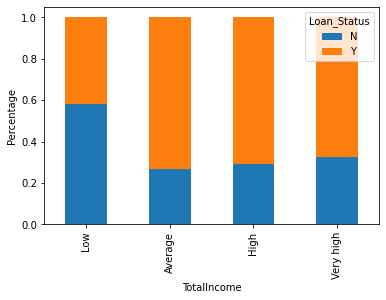

In [64]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

bins=[0,2500,4000,6000,81000]
groups=['Low','Average','High','Very high']

train['Total_Income_bin'] = pd.cut(train['Total_Income'],bins,labels=groups)

Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])

Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis =0).plot(kind="bar",stacked=True)
plt.xlabel("TotalIncome")
plt.ylabel("Percentage")

In [66]:
#The proportion of loans getting approved for applicants having low total income is very less compared to that of applicants with average,high and very high income 

Text(0, 0.5, 'Percentage')

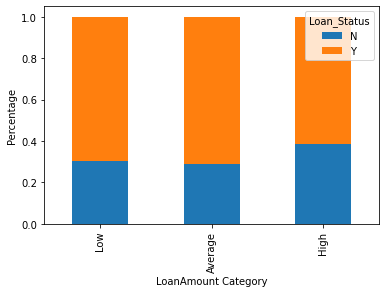

In [67]:
bins = [0,100,200,700]
groups = ['Low','Average','High']

train["LoanAmount_bin"] = pd.cut(train['LoanAmount'],bins,labels=groups)

LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])

LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis =0).plot(kind = "bar",stacked=True,)
plt.xlabel("LoanAmount Category")
plt.ylabel("Percentage")

In [69]:
#Now we will drop the bins that we have created 

train = train.drop(['Income_bin','Coapplicant_Income_bin','LoanAmount_bin','Total_Income','Total_Income_bin'],axis = 1)

In [76]:
#Changing the datatype and variables as per the requirements

train['Dependents'].replace('3+',3,inplace = True)
test['Dependents'].replace('3+',3,inplace=True)

train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

<AxesSubplot:>

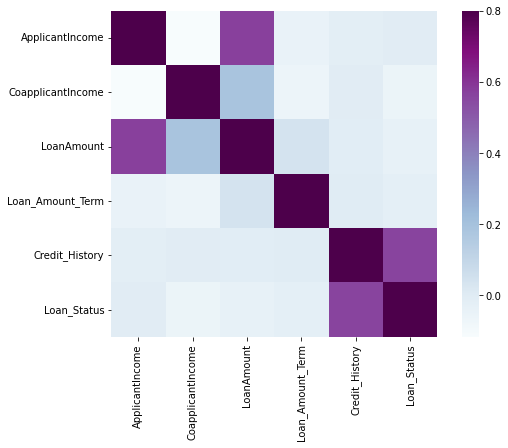

In [78]:
#Now to look at the correlation between all the variables.We will use the heat map to visualize the correlation."HEATMAPS" visualize data through variations in coloring.The darker the color the more the correlation 

matrix = train.corr() 
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax =.8,square = True,cmap="BuPu")

In [81]:
#Missing value and Outlier Treatment

#After exploring all the variables in our data, we can now impute the missing values and treat the outlier because missing data and outlier can have adverse effect on the model performance.

In [82]:
#Listing all the number of missing values in different attributes

train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [83]:
# As we can see there are lots of missing values in the Gender,Married,Dependent,Self_Employed,LoanAmount,LoanAmountTerm,CreditHisotry


In [84]:
#For numerical variable : - Mean or median imputation
#For categorical Variable: - imputation using mode

In [86]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace = True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace = True)

In [87]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [89]:
#Filling the missing value in the loan Amount Term

train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [91]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace = True)

train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace= True)

In [92]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [93]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace = True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace = True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace = True)

test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace= True)

In [94]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

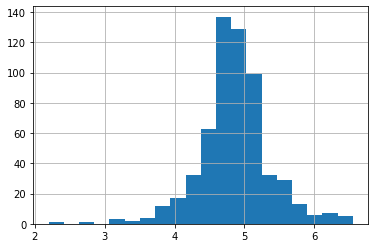

In [5]:
#As we saw in the univariate Analysis LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data.

#Due to outliers bulk of the data in the loan amount is at the left and the right tail is longe.This is called right skewness.One way to remove the skewness is by doing the log transformation.As we take the log transformation, it does not affect the smaller values much, but reduces the larger values.So, we get the disrtibution similar to the test file.

train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(train['LoanAmount'])

In [6]:
#Model Building (Logistic Regression)
#We are dropping the loan id has it has no effect on the Loan Status 

train = train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [10]:
#Now we will create the dummy variable for the categoricla variables.Dummy variable turn the categorical variables into a series of 0 and 1.Consider the "GENDER" variable.It has two classes Male and Female
#As logistic regression takes only the numerical value.Once we apply the dummies to this variable.It will convert the gender variable into two variables


X = pd.get_dummies(x)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [11]:
#Now we will train the model on training dataset and make predictions for the test dataset.We can train the model on this train part and using that make predictions for the validation part




In [26]:
x_train.shape

(529, 23)

In [27]:
y_train.shape

(12167,)

In [29]:
y_train_reshaped = y_train.reshape(-1, 1)


In [30]:
y_train_reshaped.shape

(12167, 1)

In [31]:
y_train = y_train_reshaped


In [32]:
y_train.shape

(12167, 1)

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv = train_test_split(X,y,test_size = 0.3)

y_train_reshaped = np.array(y_train).reshape(-1, 1)
y_train = y_train_reshaped


x_train['Credit_History'].fillna(x_train['Credit_History'].mode()[0],inplace = True)
x_train['Loan_Amount_Term'].fillna(x_train['Loan_Amount_Term'].mode()[0],inplace = True)
x_train['LoanAmount'].fillna(x_train['LoanAmount'].median(),inplace= True)




In [56]:
x_train.isnull().sum()

ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            0
Credit_History              0
LoanAmount_log             15
Gender_Female               0
Gender_Male                 0
Married_No                  0
Married_Yes                 0
Dependents_0                0
Dependents_1                0
Dependents_2                0
Dependents_3+               0
Education_Graduate          0
Education_Not Graduate      0
Self_Employed_No            0
Self_Employed_Yes           0
Property_Area_Rural         0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

In [58]:
x_train.drop('LoanAmount_log',1,inplace=True)

In [59]:
x_train.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                           penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
                           verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, random_state=1,
                   solver='liblinear')

In [77]:
#lets predict the loan_status for the validation set and calculate te accuracy

x_cv['Credit_History'].fillna(x_cv['Credit_History'].mode()[0],inplace = True)
x_cv['Loan_Amount_Term'].fillna(x_cv['Loan_Amount_Term'].mode()[0],inplace = True)
x_cv['LoanAmount'].fillna(x_cv['LoanAmount'].median(),inplace= True)


pred_cv = model.predict(x_cv)


In [78]:
accuracy_score(y_cv,pred_cv)

0.7945945945945946

In [79]:
#From the above accuracy , our prediciton is 80% accurate, we have identified 80% of the loan Status correctly

In [83]:
#lets make the prediction for the test dataset
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace = True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace = True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace= True)
test.drop('LoanAmount_log',axis=1,inplace=True)
pred_test = model.predict(test)

In [84]:
submission = pd.read_csv("sample_submission.csv")

In [92]:
submission['Loan_Status'] = pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [94]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [96]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

In [97]:
testdf = pd.read_csv("logistic.csv")

In [98]:
testdf.columns


Index(['Unnamed: 0', 'Loan_ID', 'Loan_Status'], dtype='object')